In [13]:
#A1

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import numpy as np

def load_data(file_path):
    """Load the dataset from an Excel file."""
    return pd.read_excel(file_path)

def binarize_labels(y_data, bins=2):
    """Convert continuous labels to binary classes."""
    return pd.cut(y_data, bins=bins, labels=[0, 1])

def predict_classes(model, X_data):
    """Predict the class labels using the given model."""
    return model.predict(X_data)

def evaluate_model(y_true, y_pred):
    """Evaluate the model using confusion matrix, classification report, and accuracy."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return conf_matrix, class_report, accuracy

def assess_model_fit(accuracy_train, accuracy_test):
    """Assess if the model is underfitting, overfitting, or has a regular fit."""
    if accuracy_train > accuracy_test and accuracy_test < 0.60:
        return "The model may be underfitting the data."
    elif accuracy_train > accuracy_test and accuracy_train - accuracy_test > 0.1:
        return "The model may be overfitting the data."
    else:
        return "The model seems to have a regular fit."

def main():
    file_path1 = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
    
    # Load the dataset
    df = load_data(file_path1)
    
    # Assuming X_train, X_test, y_train, y_test are already defined
    # Bin the continuous labels in y_test to binary classes
    y_test_class = binarize_labels(y_test)
    
    # Predict the class labels for the test set
    y_test_pred = predict_classes(knn, X_test)
    
    # Evaluate the test set
    conf_matrix_test, class_report_test, accuracy_test = evaluate_model(y_test_class, y_test_pred)
    
    # Print the evaluation results for the test set
    print("Confusion Matrix for Test Set:\n", conf_matrix_test)
    print("\nClassification Report for Test Set:\n", class_report_test)
    print(f"Accuracy for Test Set: {accuracy_test:.2f}")
    
    # Now do the same for the training set
    y_train_pred = predict_classes(knn, X_train)
    
    # Bin the continuous labels in y_train to binary classes
    y_train_class = binarize_labels(y_train)
    
    # Evaluate the training set
    conf_matrix_train, class_report_train, accuracy_train = evaluate_model(y_train_class, y_train_pred)
    
    # Print the evaluation results for the training set
    print("\nConfusion Matrix for Training Set:\n", conf_matrix_train)
    print("\nClassification Report for Training Set:\n", class_report_train)
    print(f"Accuracy for Training Set: {accuracy_train:.2f}")
    
    # Assess the model fit
    model_fit_status = assess_model_fit(accuracy_train, accuracy_test)
    print("\n", model_fit_status)

# Run the main function
if __name__ == "__main__":
    main()


Confusion Matrix for Test Set:
 [[266   2]
 [ 67   3]]

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       268
           1       0.60      0.04      0.08        70

    accuracy                           0.80       338
   macro avg       0.70      0.52      0.48       338
weighted avg       0.76      0.80      0.72       338

Accuracy for Test Set: 0.80

Confusion Matrix for Training Set:
 [[593   1]
 [192   2]]

Classification Report for Training Set:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       594
           1       0.67      0.01      0.02       194

    accuracy                           0.76       788
   macro avg       0.71      0.50      0.44       788
weighted avg       0.73      0.76      0.65       788

Accuracy for Training Set: 0.76

 The model seems to have a regular fit.


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path, sheet_name):
    """Load data from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def simulate_predicted_prices(actual_prices, noise_mean=0, noise_std=10):
    """Simulate predicted prices by adding noise to the actual prices."""
    return actual_prices + np.random.normal(noise_mean, noise_std, len(actual_prices))

def calculate_metrics(actual_prices, predicted_prices):
    """Calculate MSE, RMSE, MAPE, and R² metrics."""
    mse = mean_squared_error(actual_prices, predicted_prices)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
    r2 = r2_score(actual_prices, predicted_prices)
    return mse, rmse, mape, r2

def main():
    file_path = 'Lab Session Data (1).xlsx'
    sheet_name = 'IRCTC Stock Price'
    
    # Load the dataset
    df = load_data(file_path, sheet_name)
    
    # Assuming you have actual and predicted prices
    actual_prices = df['Price'].values
    
    # Simulate predicted prices for demonstration purposes
    predicted_prices = simulate_predicted_prices(actual_prices)
    
    # Calculate metrics
    mse, rmse, mape, r2 = calculate_metrics(actual_prices, predicted_prices)
    
    # Display the results
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAPE: {mape:.4f}%')
    print(f'R²: {r2:.4f}')

# Run the main function
if __name__ == "__main__":
    main()


MSE: 97.1700
RMSE: 9.8575
MAPE: 0.5135%
R²: 0.9983


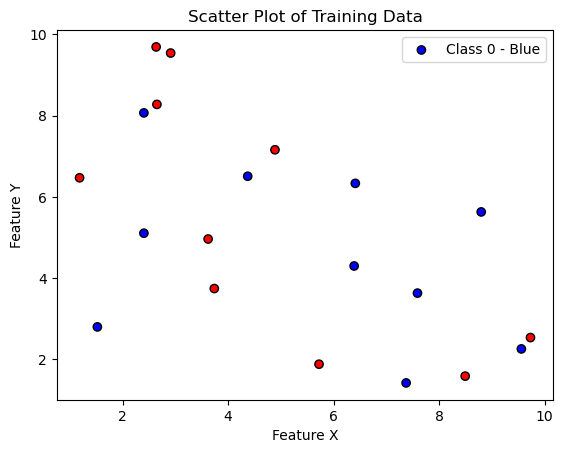

In [19]:
#A3 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_data(file_path, sheet_name):
    """Load data from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def generate_data_points(num_points=20, low=1, high=10, seed=42):
    """Generate random data points for X and Y within the specified range."""
    np.random.seed(seed)
    X = np.random.uniform(low, high, num_points)
    Y = np.random.uniform(low, high, num_points)
    return X, Y

def assign_classes(num_points, split_point=10):
    """Assign classes to data points. First half to class 0, second half to class 1."""
    return np.array([0] * split_point + [1] * (num_points - split_point))

def get_colors(classes):
    """Define colors based on the class."""
    return ['blue' if label == 0 else 'red' for label in classes]

def plot_data(X, Y, colors):
    """Create and display a scatter plot with the given data points and colors."""
    plt.scatter(X, Y, c=colors, edgecolor='k')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend(['Class 0 - Blue', 'Class 1 - Red'])
    plt.show()

def main():
    file_path = 'Lab Session Data (1).xlsx'
    sheet_name = 'IRCTC Stock Price'
    
    # Load the dataset (not used in this code but can be adapted for actual data)
    df = load_data(file_path, sheet_name)
    
    # Generate data points
    X, Y = generate_data_points()
    
    # Assign classes to the data points
    classes = assign_classes(len(X))
    
    # Get colors based on class
    colors = get_colors(classes)
    
    # Plot the data
    plot_data(X, Y, colors)

# Run the main function
if __name__ == "__main__":
    main()


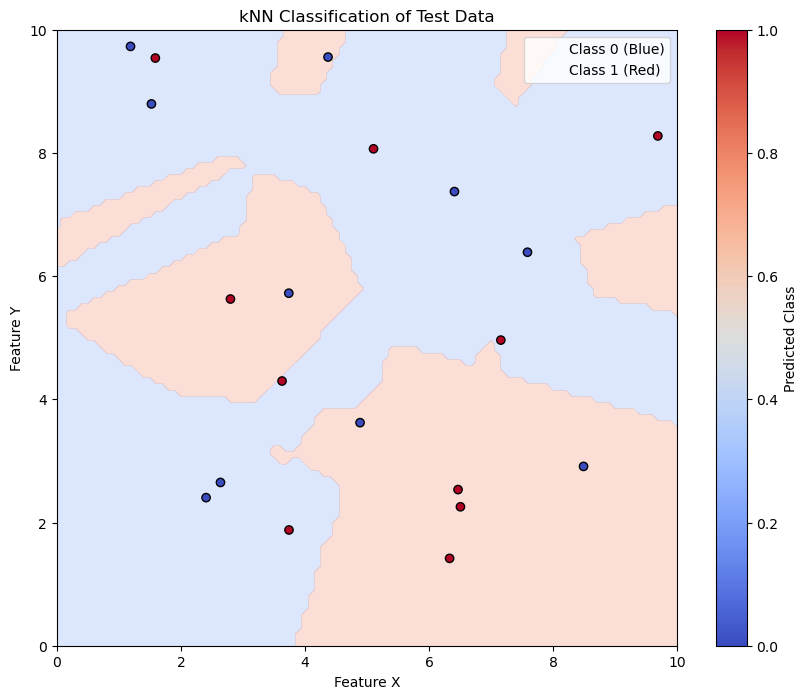

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def load_data(file_path, sheet_name):
    """Load data from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def generate_training_data(num_points=20, low=1, high=10, split_point=10, seed=42):
    """Generate random training data points with class labels."""
    np.random.seed(seed)
    X_train = np.random.uniform(low, high, (num_points, 2))
    Y_train = np.array([0] * split_point + [1] * (num_points - split_point))
    return X_train, Y_train

def train_knn_classifier(X_train, Y_train, n_neighbors=3):
    """Train a kNN classifier with the provided training data."""
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train, Y_train)
    return knn_classifier

def generate_test_data(x_range=(0, 10.1), y_range=(0, 10.1), step=0.1):
    """Generate a grid of test data points."""
    x_test, y_test = np.meshgrid(np.arange(*x_range, step), np.arange(*y_range, step))
    test_points = np.vstack((x_test.ravel(), y_test.ravel())).T
    return x_test, y_test, test_points

def predict_classes(knn_classifier, test_points):
    """Predict class labels for the test data."""
    return knn_classifier.predict(test_points)

def plot_classification_results(x_test, y_test, y_test_pred, X_train, Y_train):
    """Plot the classification results along with the training data."""
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('kNN Classification of Test Data')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')
    plt.show()

def main():
    file_path = 'Lab Session Data (1).xlsx'
    sheet_name = 'IRCTC Stock Price'
    
    # Load data (not directly used in this plotting scenario)
    df = load_data(file_path, sheet_name)
    
    # Generate training data
    X_train, Y_train = generate_training_data()
    
    # Train the kNN classifier
    knn_classifier = train_knn_classifier(X_train, Y_train)
    
    # Generate test data
    x_test, y_test, test_points = generate_test_data()
    
    # Predict classes for the test set
    y_test_pred = predict_classes(knn_classifier, test_points)
    
    # Plot the classification results
    plot_classification_results(x_test, y_test, y_test_pred, X_train, Y_train)

# Run the main function
if __name__ == "__main__":
    main()


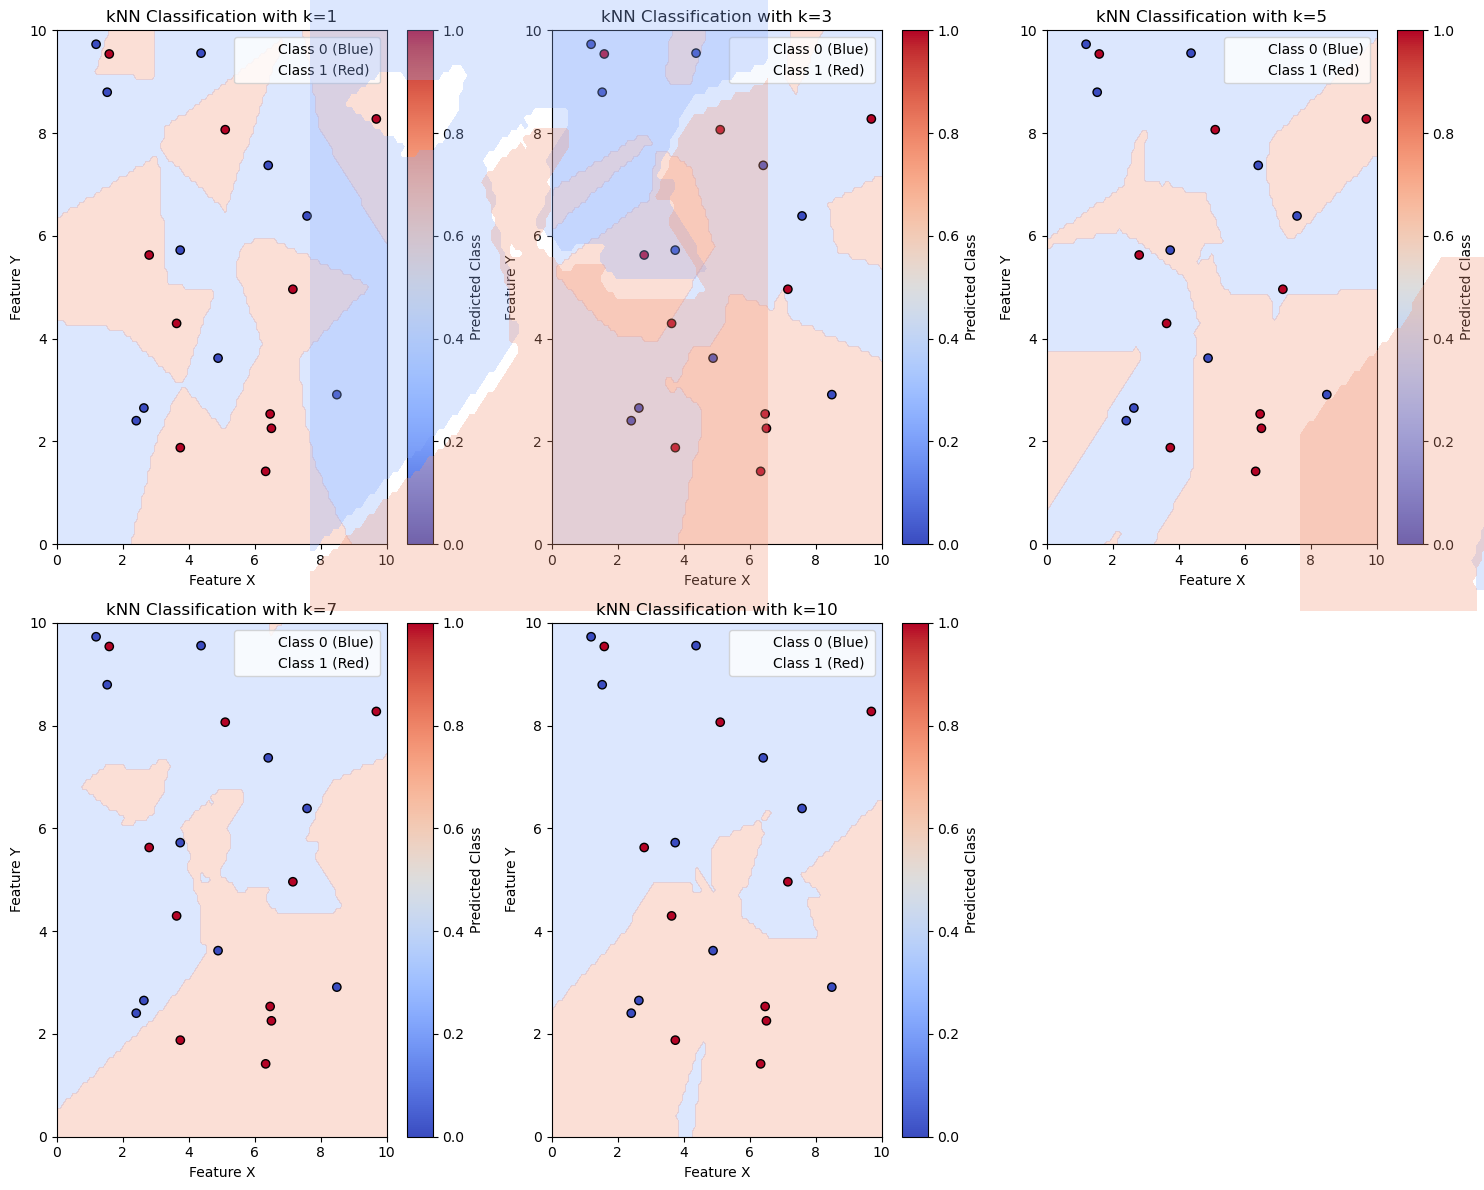

In [22]:
#A5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def load_data(file_path, sheet_name):
    """Load data from an Excel file."""
    return pd.read_excel(file_path, sheet_name=sheet_name)

def generate_training_data(num_points=20, low=1, high=10, split_point=10, seed=42):
    """Generate random training data points with class labels."""
    np.random.seed(seed)
    X_train = np.random.uniform(low, high, (num_points, 2))
    Y_train = np.array([0] * split_point + [1] * (num_points - split_point))
    return X_train, Y_train

def generate_test_data(x_range=(0, 10.1), y_range=(0, 10.1), step=0.1):
    """Generate a grid of test data points."""
    x_test, y_test = np.meshgrid(np.arange(*x_range, step), np.arange(*y_range, step))
    test_points = np.vstack((x_test.ravel(), y_test.ravel())).T
    return x_test, y_test, test_points

def train_knn_classifier(X_train, Y_train, k):
    """Train a kNN classifier with the provided training data and specified k."""
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    return knn_classifier

def predict_classes(knn_classifier, test_points):
    """Predict class labels for the test data."""
    return knn_classifier.predict(test_points)

def plot_knn_classification(k_values, X_train, Y_train, x_test, y_test, test_points):
    """Plot kNN classification results for multiple values of k."""
    plt.figure(figsize=(15, 12))
    for i, k in enumerate(k_values, 1):
        # Train the kNN classifier
        knn_classifier = train_knn_classifier(X_train, Y_train, k)
        
        # Predict classes for the test set
        y_test_pred = predict_classes(knn_classifier, test_points)
        y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
        
        # Plot the results
        plt.subplot(2, 3, i)
        plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.title(f'kNN Classification with k={k}')
        plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
        plt.colorbar(label='Predicted Class')
    
    plt.tight_layout()
    plt.show()

def main():
    file_path = 'Lab Session Data (1).xlsx'
    sheet_name = 'IRCTC Stock Price'
    
    # Load data (not directly used in this plotting scenario)
    df = load_data(file_path, sheet_name)
    
    # Generate training data
    X_train, Y_train = generate_training_data()
    
    # Generate test data
    x_test, y_test, test_points = generate_test_data()
    
    # Define values of k to test
    k_values = [1, 3, 5, 7, 10]
    
    # Plot the kNN classification results for different k values
    plot_knn_classification(k_values, X_train, Y_train, x_test, y_test, test_points)

# Run the main function
if __name__ == "__main__":
    main()


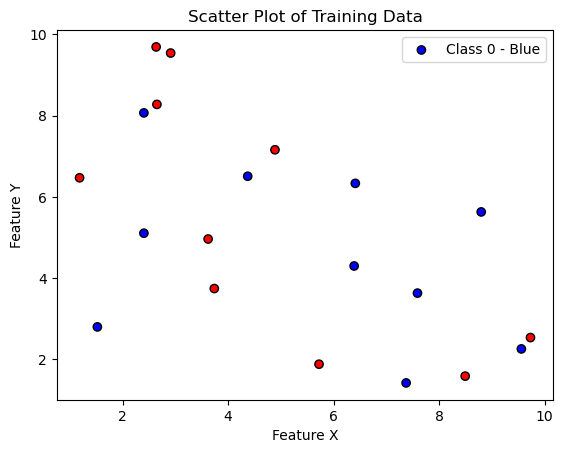

In [29]:
#A6_3

#A6_3
import numpy as np
import matplotlib.pyplot as plt
file_path = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 20 data points for X and Y, with values between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes to the data points
# For simplicity, let's assign the first 10 points to class 0 and the last 10 points to class 1
classes = np.array([0]*10 + [1]*10)

# Define colors based on the class
colors = ['blue' if label == 0 else 'red' for label in classes]

# Create a scatter plot
plt.scatter(X, Y, c=colors, edgecolor='k')

# Label the axes
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

# Add a title
plt.title('Scatter Plot of Training Data')

# Add a legend
plt.legend(['Class 0 - Blue', 'Class 1 - Red'])

# Display the plot
plt.show()


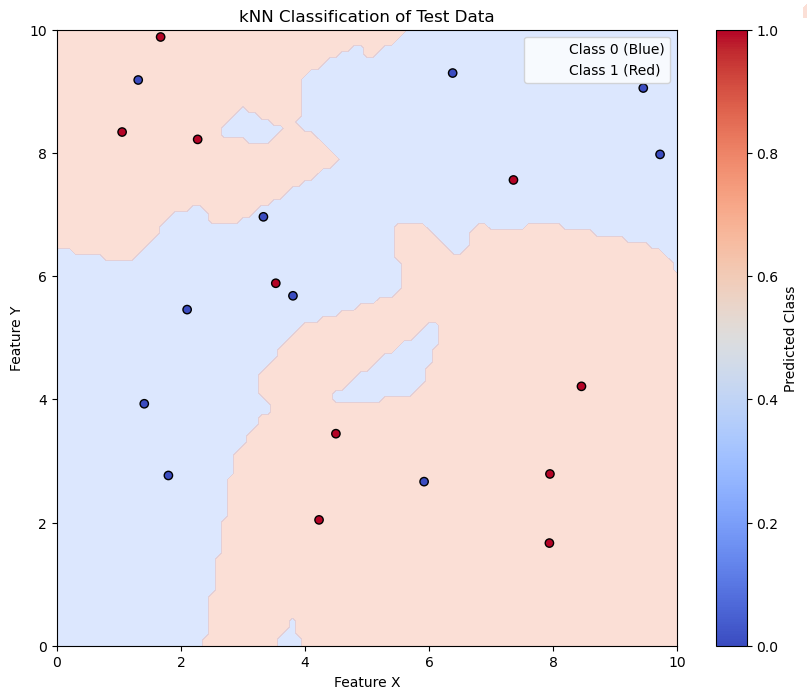

In [30]:
#A6_4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Recreate the training data for the kNN classifier
# Generate 20 training points
file_path = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define the kNN classifier and train it
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Y_train)

# Generate test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Predict classes for test set
y_test_pred = knn_classifier.predict(test_points)

# Reshape predictions for plotting
y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)

# Plot the test data with color coding based on the predicted class
plt.figure(figsize=(10, 8))
plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
plt.colorbar(label='Predicted Class')
plt.show()


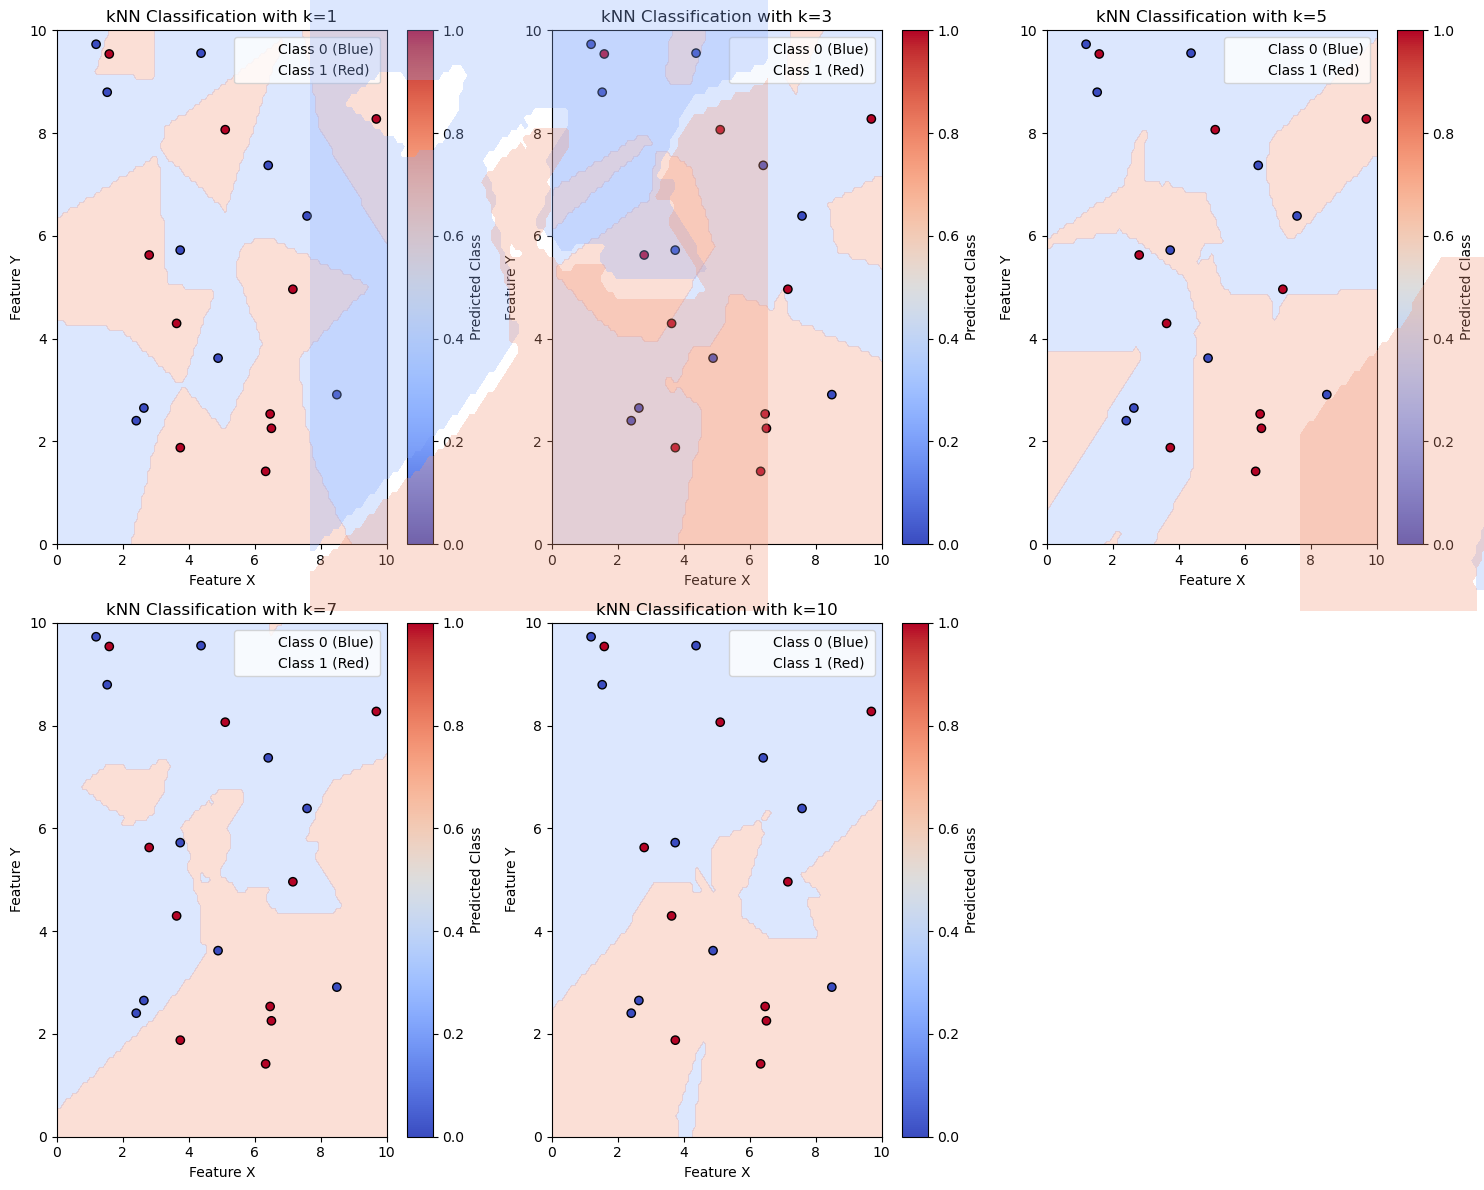

In [31]:
#A6_5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
file_path = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Generate training data
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class 0 and 1

# Define test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flat = x_test.ravel()
y_test_flat = y_test.ravel()
test_points = np.vstack((x_test_flat, y_test_flat)).T

# Values of k to test
k_values = [1, 3, 5, 7, 10]

# Plot for each value of k
plt.figure(figsize=(15, 12))
for i, k in enumerate(k_values, 1):
    # Initialize and train the kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    
    # Predict classes for test set
    y_test_pred = knn_classifier.predict(test_points)
    y_test_pred_reshaped = y_test_pred.reshape(x_test.shape)
    
    # Plot the results
    plt.subplot(2, 3, i)
    plt.contourf(x_test, y_test, y_test_pred_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')

plt.tight_layout()
plt.show()


In [32]:
#A7

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

def load_dataset(file_path):
    """Load the dataset from an Excel file."""
    return pd.read_excel(file_path)

def preprocess_data(df):
    """Preprocess the dataset by defining feature columns and target variable."""
    embedding_columns = df.columns[:-1]  # All columns except the last one
    df['output'] = pd.cut(df['output'], bins=2, labels=[0, 1]) if np.issubdtype(df['output'].dtype, np.number) else df['output']
    X = df[embedding_columns].values
    y = df['output'].values
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_grid_search(X_train, y_train, param_grid):
    """Perform grid search to find the best k value for kNN."""
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_['n_neighbors'], grid_search.best_score_, grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    """Evaluate the model on the test set and return the accuracy."""
    y_test_pred = model.predict(X_test)
    return accuracy_score(y_test, y_test_pred)

def main():
    file_path = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
    
    # Load the dataset
    df = load_dataset(file_path)
    
    # Preprocess the data
    X, y = preprocess_data(df)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Define the parameter grid for k
    param_grid = {'n_neighbors': list(range(1, 21))}
    
    # Perform grid search to find the best k value and model
    best_k, best_score, best_model = perform_grid_search(X_train, y_train, param_grid)
    
    # Evaluate the best model on the test set
    test_accuracy = evaluate_model(best_model, X_test, y_test)
    
    # Display the results
    print(f"Best k value: {best_k}")
    print(f"Best cross-validated accuracy: {best_score:.4f}")
    print(f"Test set accuracy: {test_accuracy:.4f}")

# Run the main function
if __name__ == "__main__":
    main()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k value: 5
Best cross-validated accuracy: 0.7741
Test set accuracy: 0.6982


In [33]:
#A8

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

def load_dataset(file_path):
    """Load the dataset from an Excel file."""
    return pd.read_excel(file_path)

def preprocess_data(df):
    """Preprocess the dataset by defining feature columns and target variable."""
    embedding_columns = df.columns[:-1]  # All columns except the last one
    df['output'] = pd.cut(df['output'], bins=2, labels=[0, 1]) if np.issubdtype(df['output'].dtype, np.number) else df['output']
    X = df[embedding_columns].values
    y = df['output'].values
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def perform_random_search(X_train, y_train, param_dist, n_iter=10, cv=5, random_state=42):
    """Perform randomized search to find the best k value for kNN."""
    knn = KNeighborsClassifier()
    random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=n_iter, cv=cv, scoring='accuracy', verbose=1, random_state=random_state)
    random_search.fit(X_train, y_train)
    return random_search.best_params_['n_neighbors'], random_search.best_score_, random_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    """Evaluate the model on the test set and return the accuracy."""
    y_test_pred = model.predict(X_test)
    return accuracy_score(y_test, y_test_pred)

def main():
    file_path = 'C:\\Users\\tarun\\Lab Codes\\training_mathbert.xlsx'
    
    # Load the dataset
    df = load_dataset(file_path)
    
    # Preprocess the data
    X, y = preprocess_data(df)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Define the parameter distribution for k
    param_dist = {'n_neighbors': np.arange(1, 21)}
    
    # Perform randomized search to find the best k value and model
    best_k, best_score, best_model = perform_random_search(X_train, y_train, param_dist)
    
    # Evaluate the best model on the test set
    test_accuracy = evaluate_model(best_model, X_test, y_test)
    
    # Display the results
    print(f"Best k value: {best_k}")
    print(f"Best cross-validated accuracy: {best_score:.4f}")
    print(f"Test set accuracy: {test_accuracy:.4f}")

# Run the main function
if __name__ == "__main__":
    main()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best k value: 12
Best cross-validated accuracy: 0.7577
Test set accuracy: 0.7160
